In [ ]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from timeit import timeit


In [3]:
current_dir = os.getcwd()
path = os.path.join(current_dir, "household_power_consumption.txt")

types_pandas = {
    "Date": "str", 
    "Time": "str", 
    "Global_active_power": "float64", 
    "Global_reactive_power": "float64", 
    "Voltage": "float64", 
    "Global_intensity": "float64", 
    "Sub_metering_1": "float64", 
    "Sub_metering_2": "float64", 
    "Sub_metering_3": "float64"
    }

types_numpy = [
    ("Date", "U10"), 
    ("Time", "U8"), 
    ("Global_active_power", "float64"), 
    ("Global_reactive_power", "float64"), 
    ("Voltage", "float64"), 
    ("Global_intensity", "float64"), 
    ("Sub_metering_1", "float64"), 
    ("Sub_metering_2", "float64"), 
    ("Sub_metering_3", "float64")
    ]

df_pandas = pd.read_csv(path, sep=';', dtype=types_pandas, na_values='?', encoding="UTF-8")
df_pandas['Date'] = pd.to_datetime(df_pandas['Date'], format='%d/%m/%Y')

df_numpy = np.genfromtxt(path, delimiter=';', missing_values=["?",np.nan], dtype=types_numpy, encoding="UTF=8", names=True)

In [ ]:
def task_1_1(df):
    filtered_df = df[df['Global_active_power'] > 5]

    return filtered_df

pandas_time = timeit("task_1_1(df_pandas)", globals=globals(), number=100)
numpy_time = timeit("task_1_1(df_numpy)", globals=globals(), number=100)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

Pandas time: 0.4886 seconds
Numpy time: 1.7087 seconds


In [ ]:
def task_1_2(df):
    filtered_df = df[df['Voltage'] > 235]
    
    return filtered_df

pandas_time = timeit("task_1_2(df_pandas)", globals=globals(), number=100)
numpy_time = timeit("task_1_2(df_numpy)", globals=globals(), number=100)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

Pandas time: 9.9574 seconds
Numpy time: 14.1914 seconds


In [ ]:
def task_1_3(df):
    filtered_df = df[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20)]
    
    return filtered_df

pandas_time = timeit("task_1_3(df_pandas)", globals=globals(), number=100)
numpy_time = timeit("task_1_3(df_numpy)", globals=globals(), number=100)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

Pandas time: 0.6622 seconds
Numpy time: 2.6526 seconds


In [ ]:
def task_1_4(df):
    if isinstance(df, pd.DataFrame):
        random_df = df.sample(n=500000, replace=True)
        global_active_power = random_df['Global_active_power'].mean()
        global_voltage = random_df['Voltage'].mean()
        global_intensity = random_df['Global_intensity'].mean()
    else:
        indices = np.random.choice(df.shape[0], size=500000, replace=True)
        random_df = df[indices]
        global_active_power = np.mean(random_df['Global_active_power'])
        global_voltage = np.mean(random_df['Voltage'])
        global_intensity = np.mean(random_df['Global_intensity'])

    return global_active_power, global_voltage, global_intensity

pandas_time = timeit("task_1_4(df_pandas)", globals=globals(), number=100)
numpy_time = timeit("task_1_4(df_numpy)", globals=globals(), number=100)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

Pandas time: 11.8469 seconds
Numpy time: 9.8502 seconds


In [ ]:
def task_1_5(df):
    filtered_df = df[(df['Time'] > '18:00:00') & (df['Global_active_power'] > 6)]
    if isinstance(df, pd.DataFrame): 
        filtered_df = filtered_df[filtered_df[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].idxmax(axis=1) == "Sub_metering_2"]
        
        middle = len(filtered_df) // 2
        first_half = filtered_df.iloc[:middle]
        second_half = filtered_df.iloc[middle:]

        first_half = first_half.iloc[::3]
        second_half = second_half.iloc[::4]

        filtered_df = pd.concat([first_half, second_half], ignore_index=True)
    else:
        sub_metering_values = np.vstack((filtered_df['Sub_metering_1'], filtered_df['Sub_metering_2'], filtered_df['Sub_metering_3'])).T
        filtered_df = filtered_df[np.argmax(sub_metering_values, axis=1) == 1]

        middle = len(filtered_df) // 2

        first_half = filtered_df[:middle]
        second_half = filtered_df[middle:]

        first_half = first_half[::3]
        second_half = second_half[::4]

        filtered_df = np.concatenate((first_half, second_half), axis=0)
        
    return filtered_df

pandas_time = timeit("task_1_5(df_pandas)", globals=globals(), number=100)
numpy_time = timeit("task_1_5(df_numpy)", globals=globals(), number=100)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

Pandas time: 8.4561 seconds
Numpy time: 7.2601 seconds


In [46]:
current_dir = os.getcwd()
path = os.path.join(current_dir, "AirQualityUCI.csv")

with open(path, 'r', encoding='UTF-8') as file:
    data = file.read().replace(',', '.')

with open(path, 'w', encoding='UTF-8') as file:
    file.write(data)

types_pandas = {
    "Date": "str", 
    "Time": "str", 
    "CO(GT)":  "float64", 
    "PT08.S1(CO)": "float64", 
    "NMHC(GT)": "float64", 
    "C6H6(GT)": "float64", 
    "PT08.S2(NMHC)": "float64", 
    "NOx(GT)": "float64", 
    "PT08.S3(NOx)": "float64", 
    "NO2(GT)": "float64", 
    "PT08.S4(NO2)": "float64", 
    "PT08.S5(O3)": "float64", 
    "T": "float64", 
    "RH": "float64", 
    "AH": "float64"
}

types_numpy = [
    ("Date", "U10"), 
    ("Time", "U8"), 
    ("CO(GT)", "float64"), 
    ("PT08.S1(CO)", "float64"), 
    ("NMHC(GT)", "float64"), 
    ("C6H6(GT)", "float64"), 
    ("PT08.S2(NMHC)", "float64"), 
    ("NOx(GT)", "float64"), 
    ("PT08.S3(NOx)", "float64"), 
    ("NO2(GT)", "float64"), 
    ("PT08.S4(NO2)", "float64"), 
    ("PT08.S5(O3)", "float64"), 
    ("T", "float64"), 
    ("RH", "float64"), 
    ("AH", "float64")
]

df_numpy = np.genfromtxt(path, delimiter=';', missing_values=["-200"], dtype=types_numpy, encoding="UTF-8", names=True)

valid_rows = [all((value != -200) and (value != '') for value in row) for row in df_numpy]
df_numpy = df_numpy[valid_rows]

df_pandas = pd.read_csv(path, sep=';', index_col=False, header=0, dtype=types_pandas, na_values=-200, encoding="UTF-8")
df_pandas['Date'] = pd.to_datetime(df_pandas['Date'], format='%d/%m/%Y')
df_pandas['Time'] = pd.to_datetime(df_pandas['Time'], format='%H.%M.%S').dt.time
df_pandas = df_pandas.drop(columns=['Unnamed: 15', "Unnamed: 16"], errors='ignore')
df_pandas = df_pandas.dropna()



In [51]:
def task_2_1_norm(df):
    if isinstance(df, pd.DataFrame):
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        norm_df = df.copy()
        min_df = df[numeric_cols].min()
        max_df = df[numeric_cols].max()
        norm_df[numeric_cols] = (df[numeric_cols] - min_df) / (max_df - min_df)
    else:
        numeric_cols = df.dtype.names[2:]
        norm_df = df.copy()
        for col in numeric_cols:
            min_df = np.min(df[col])
            max_df = np.max(df[col])
            norm_df[col] = (df[col] - min_df) / (max_df - min_df)

    return norm_df

pandas_time = timeit("task_2_1_norm(df_pandas)", globals=globals(), number=100)
numpy_time = timeit("task_2_1_norm(df_numpy)", globals=globals(), number=100)

print("Час пронормування даних")
print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds\n")

def task_2_1_stan(df):
    if isinstance(df, pd.DataFrame):
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        stan_df = df.copy()
        mean_df = df[numeric_cols].mean()
        std_df = df[numeric_cols].std()
        stan_df[numeric_cols] = (df[numeric_cols] - mean_df) / std_df
    else:
        numeric_cols = df.dtype.names[2:]
        stan_df = df.copy()
        for col in numeric_cols:
            mean_df = np.mean(df[col])
            std_df = np.std(df[col])
            stan_df[col] = (df[col] - mean_df) / std_df
    
    return stan_df

pandas_time = timeit("task_2_1_stan(df_pandas)", globals=globals(), number=100)
numpy_time = timeit("task_2_1_stan(df_numpy)", globals=globals(), number=100)

print("Час стандартизації даних")
print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

Час пронормування даних
Pandas time: 0.3314 seconds
Numpy time: 0.0262 seconds

Час стандартизації даних
Pandas time: 0.3216 seconds
Numpy time: 0.0540 seconds


Pandas time: 0.0150 seconds
Numpy time: 0.0135 seconds


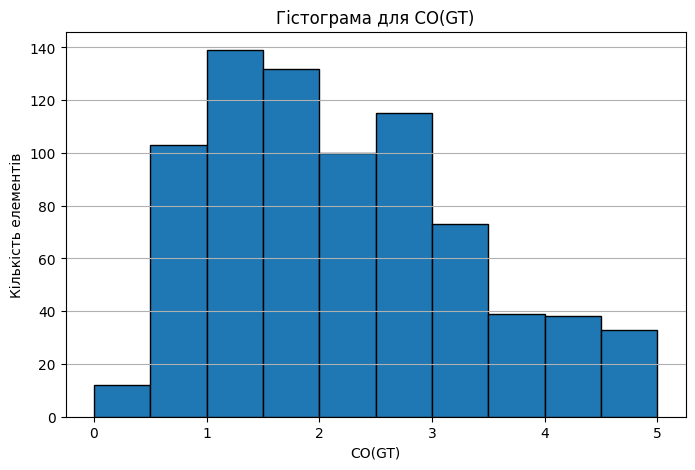

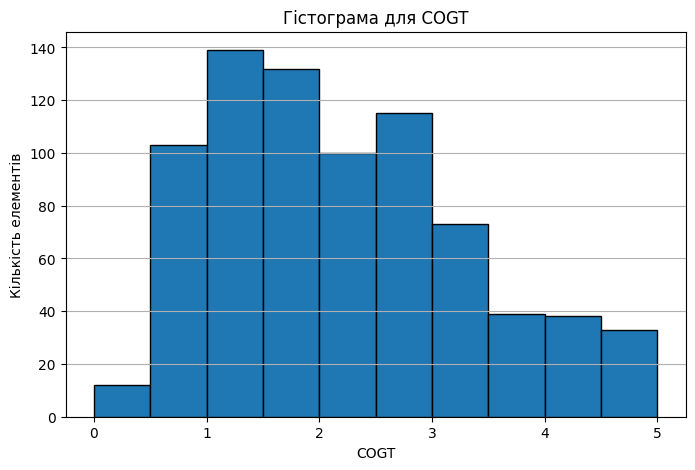

In [ ]:
def task_2_2(df):
    if isinstance(df, pd.DataFrame):
        attribute = 'CO(GT)'
    else:
        attribute = 'COGT'

    ranges = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

    plt.figure(figsize=(8, 5))
    plt.hist(df[attribute], bins=ranges)
    plt.xlabel(attribute)
    plt.ylabel('Кількість елементів')
    # plt.show()

pandas_time = timeit("task_2_2(df_pandas)", globals=globals(), number=1)
numpy_time = timeit("task_2_2(df_numpy)", globals=globals(), number=1)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

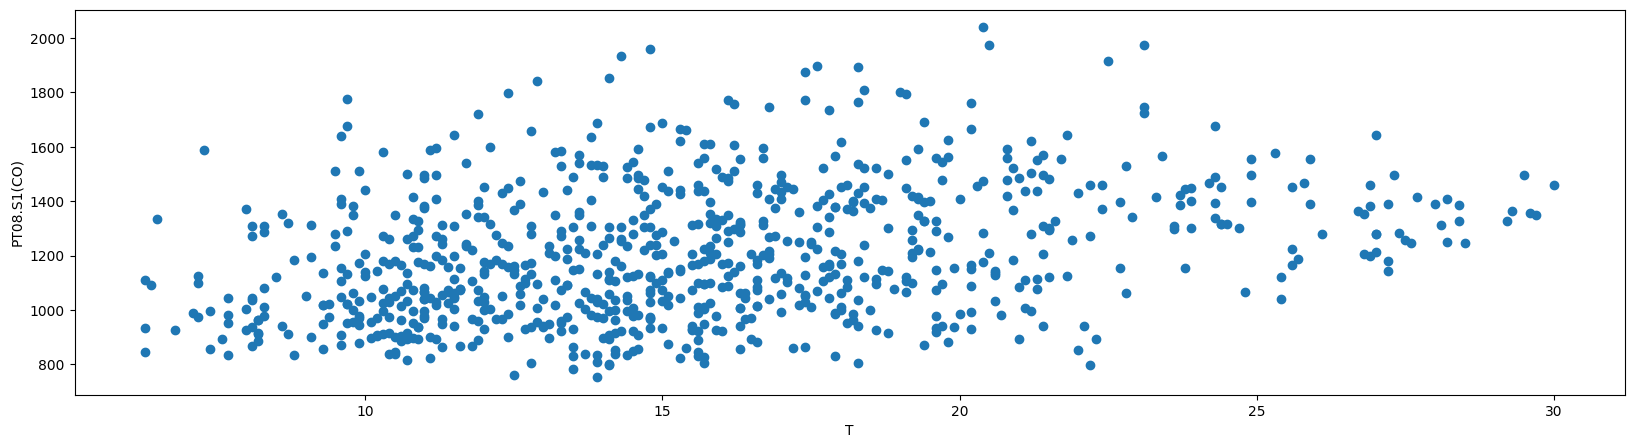

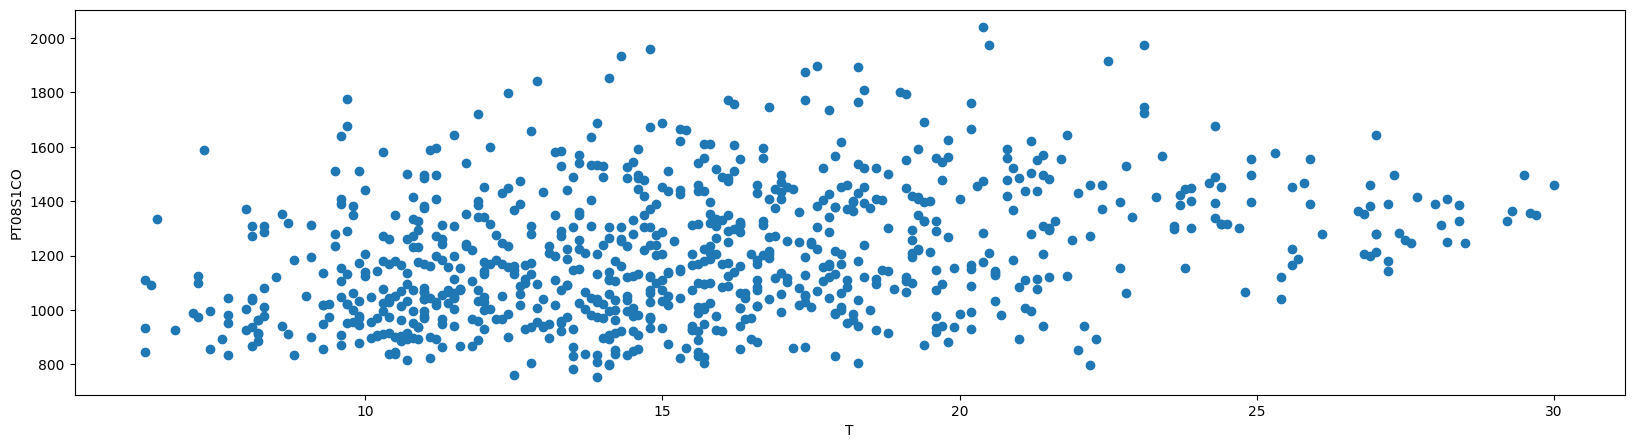

Pandas time: 0.1126 seconds
Numpy time: 0.1198 seconds


In [67]:
def task_2_3(df):
    attribute_1 = 'T'
    if isinstance(df, pd.DataFrame):
        attribute_2 = 'PT08.S1(CO)'
    else:
        attribute_2 = 'PT08S1CO'

    plt.figure(figsize=(20, 5))
    plt.scatter(df[attribute_1], df[attribute_2])
    plt.xlabel(attribute_1)
    plt.ylabel(attribute_2)
    plt.show()

pandas_time = timeit("task_2_3(df_pandas)", globals=globals(), number=1)
numpy_time = timeit("task_2_3(df_numpy)", globals=globals(), number=1)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

In [71]:
def task_2_4(df):
    if isinstance(df, pd.DataFrame):
            attribute_1 = 'NO2(GT)'
    else:
        attribute_1 = 'NO2GT'
        
    attribute_2 = 'AH'


    pearson_corr = stats.pearsonr(df[attribute_1], df[attribute_2])
    spearman_corr = stats.spearmanr(df[attribute_1], df[attribute_2])

    return pearson_corr, spearman_corr

pandas_time = timeit("task_2_4(df_pandas)", globals=globals(), number=100)
numpy_time = timeit("task_2_4(df_numpy)", globals=globals(), number=100)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

Pandas time: 0.1104 seconds
Numpy time: 0.0809 seconds


In [76]:
def task_2_5(df):
    if isinstance(df, pd.DataFrame):
        encoded_df = pd.get_dummies(df, columns=['Time'])
    else:
        encoded_df = OneHotEncoder().fit_transform(df['Time'].reshape(1, -1))

    return encoded_df

pandas_time = timeit("task_2_5(df_pandas)", globals=globals(), number=100)
numpy_time = timeit("task_2_5(df_numpy)", globals=globals(), number=100)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")

Pandas time: 0.1881 seconds
Numpy time: 9.0284 seconds


Pandas time: 12.0058 seconds
Numpy time: 12.6014 seconds


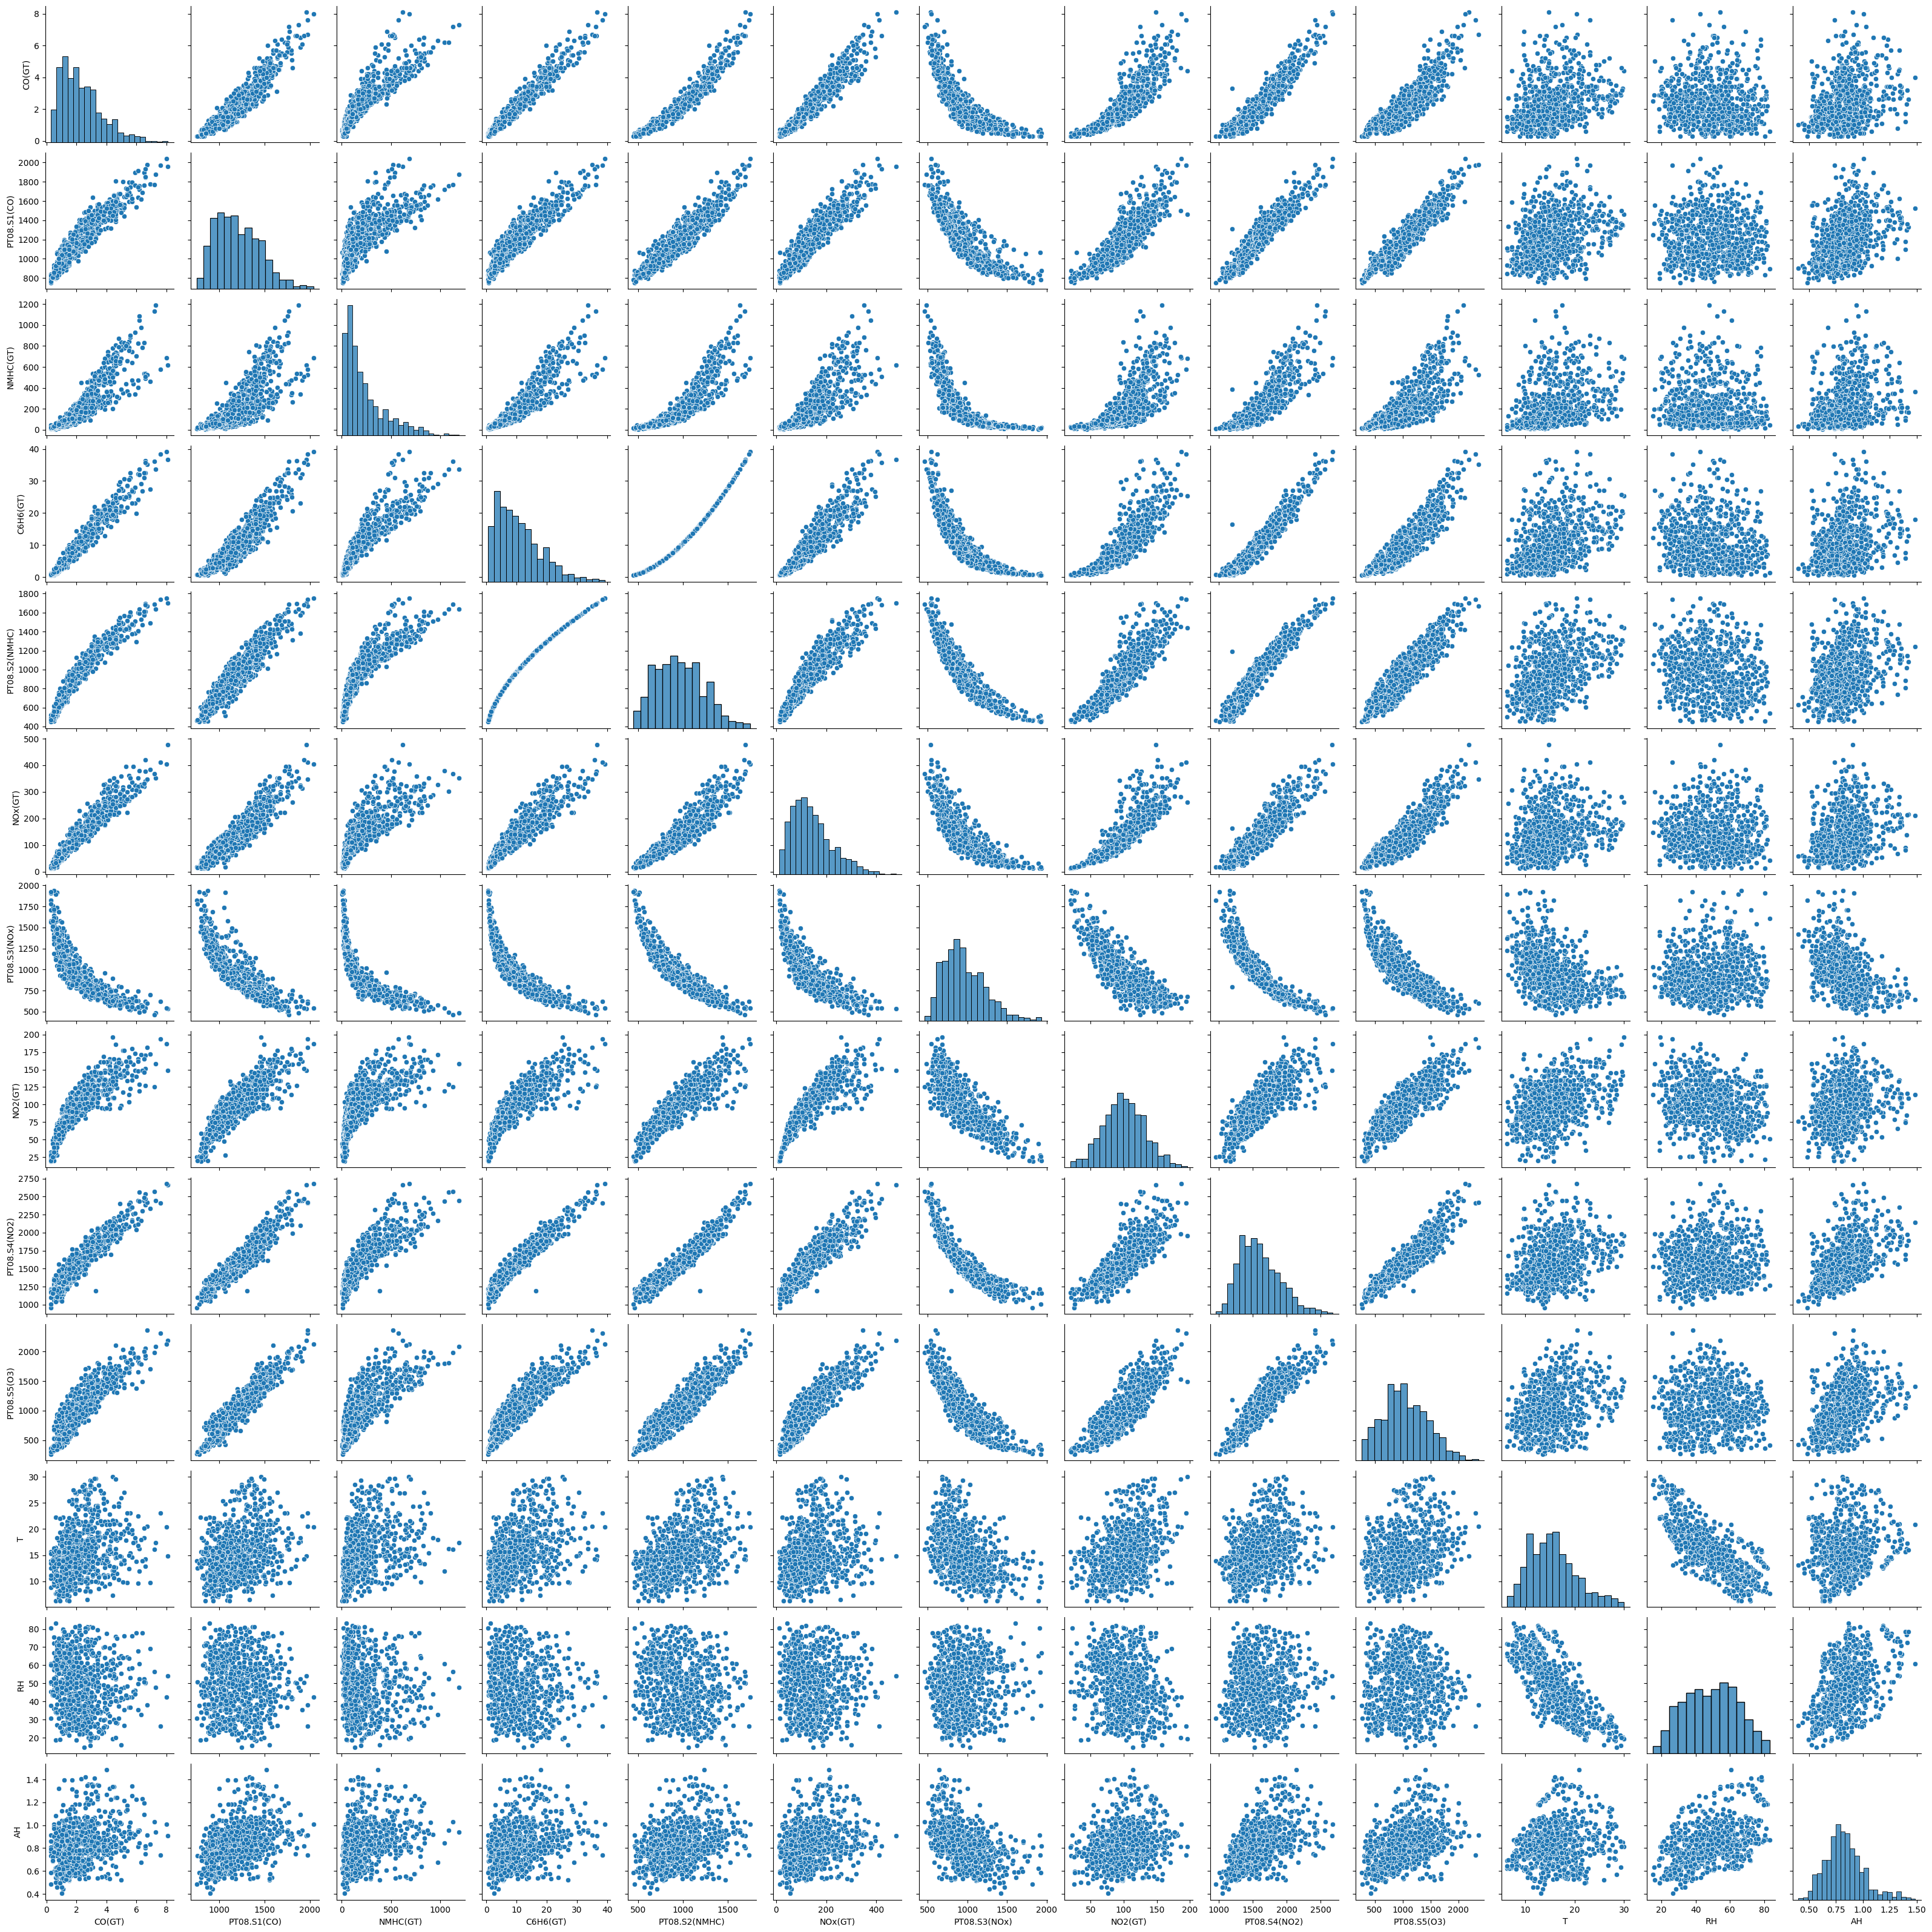

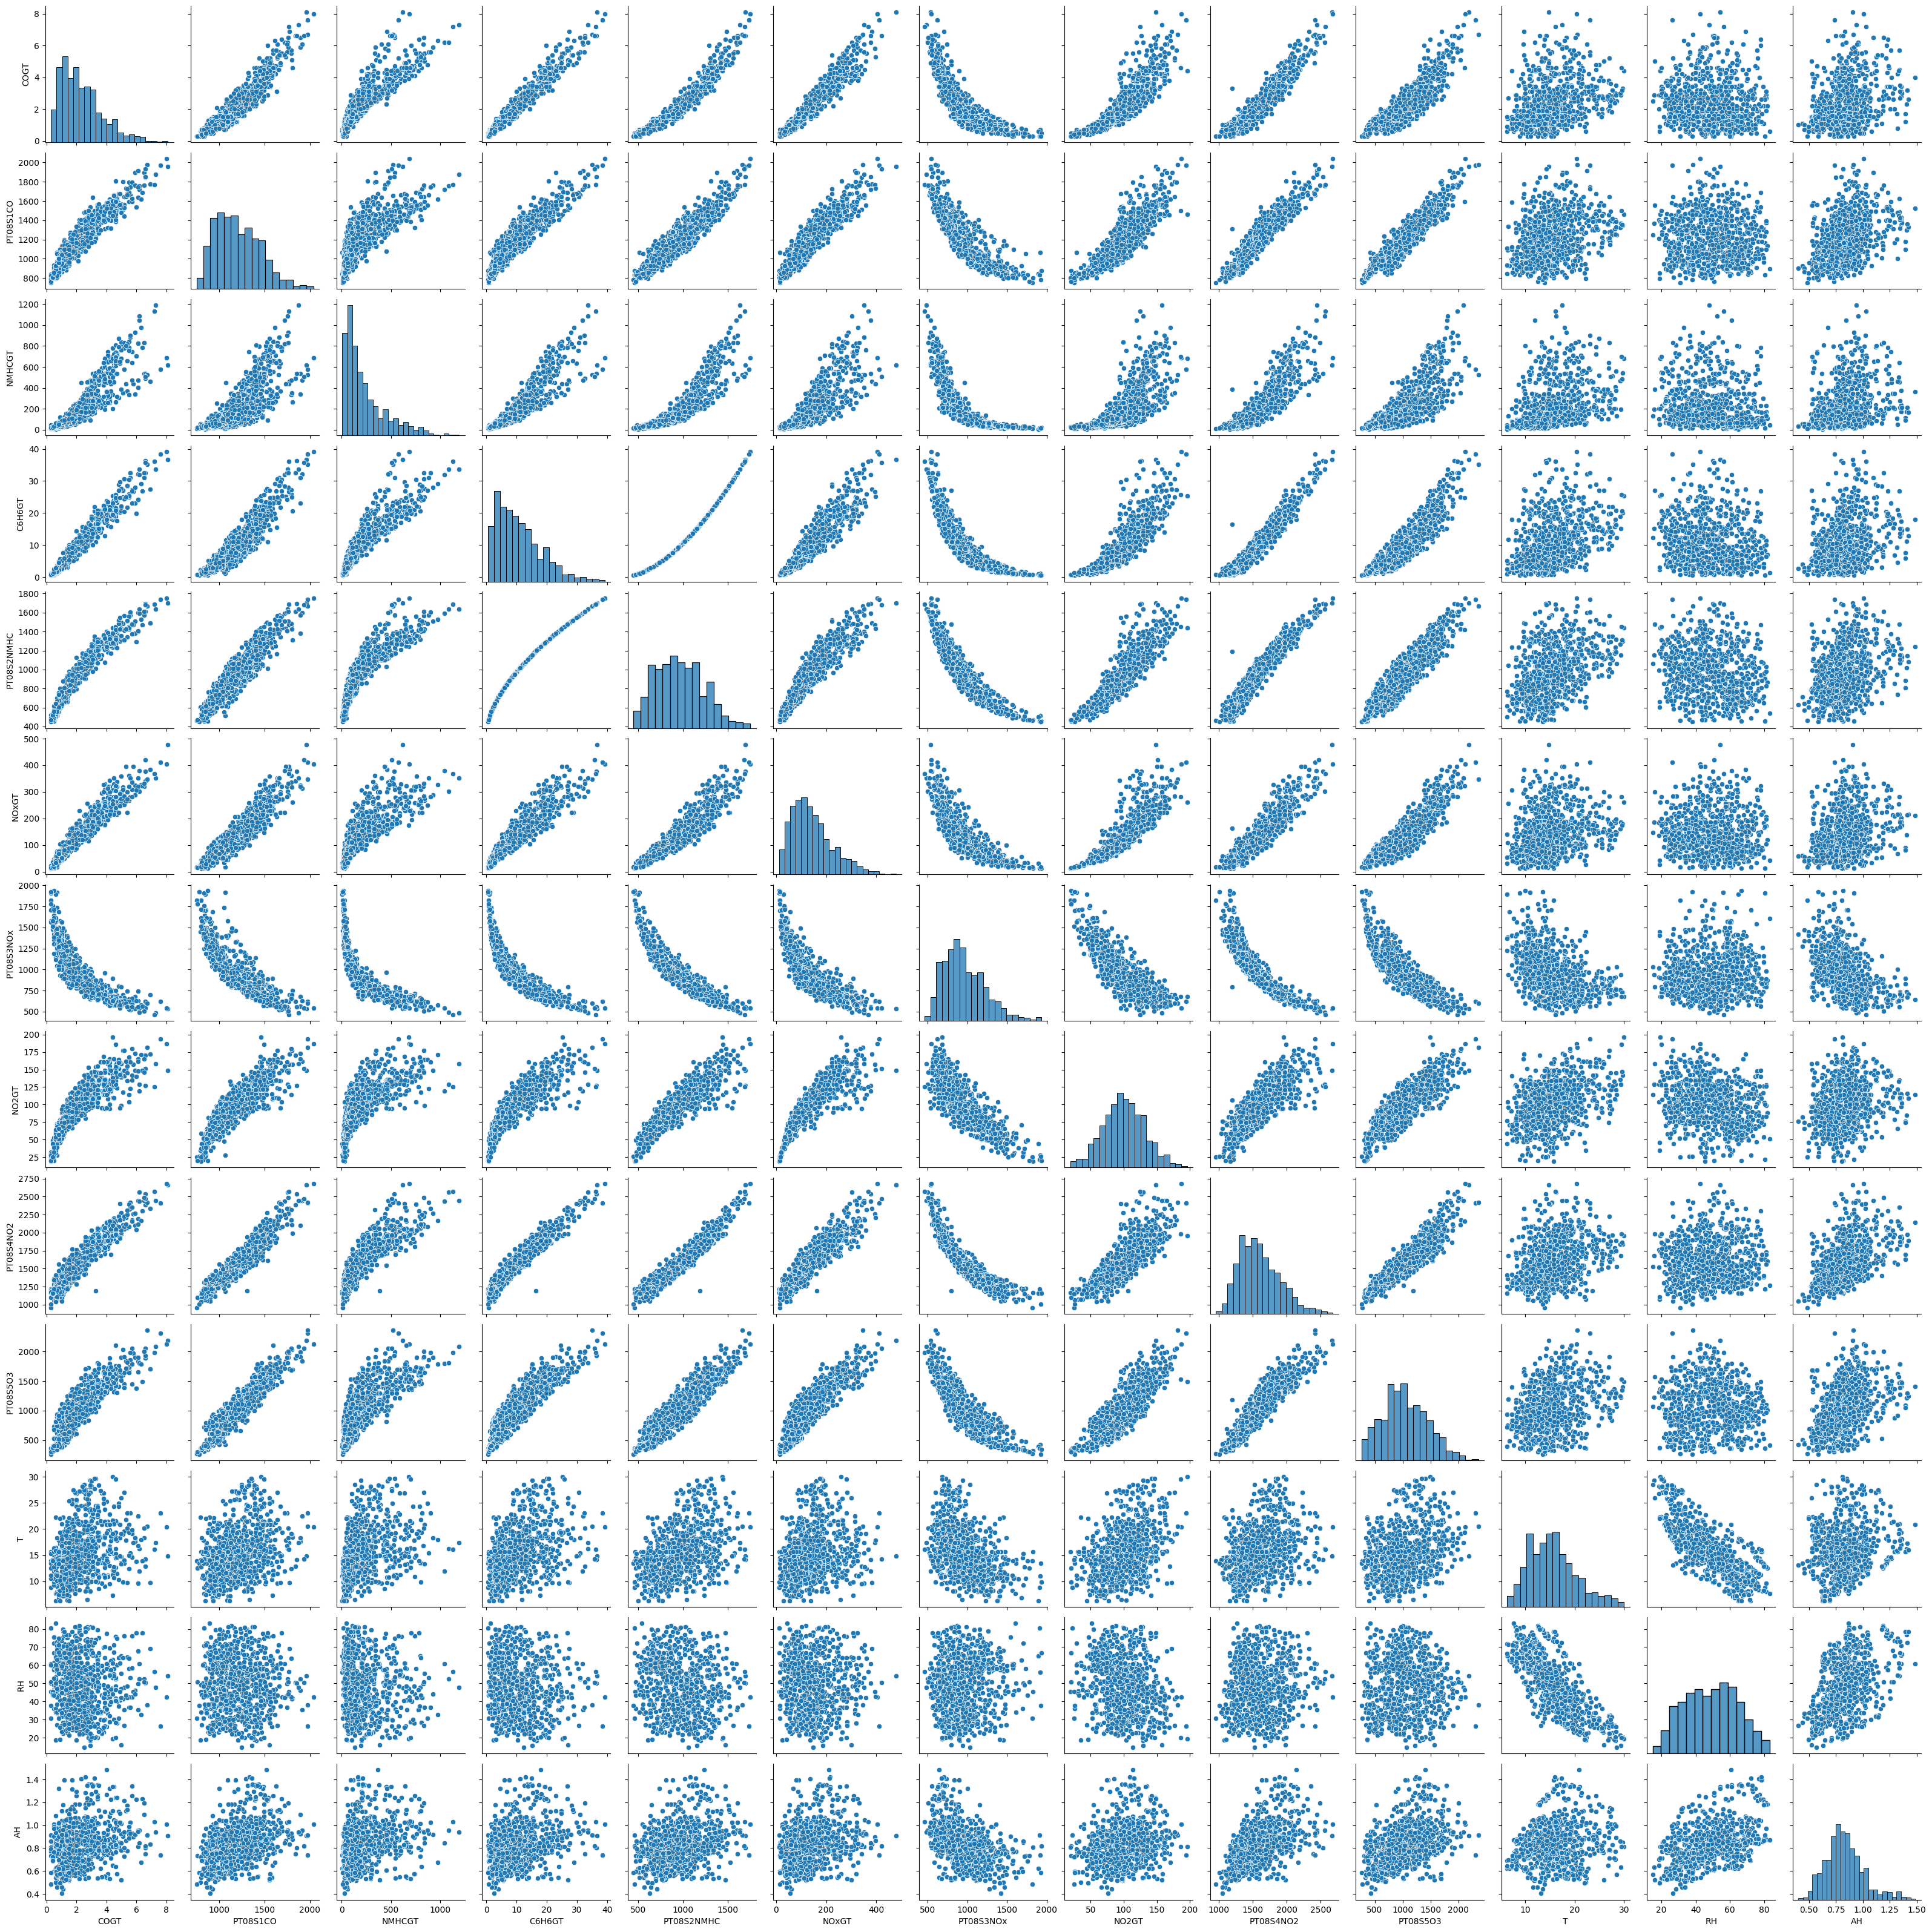

In [81]:
def task_2_6(df):
    if not isinstance(df, pd.DataFrame):
        new_df = pd.DataFrame(df)
    else:
        new_df = df.copy()
    
    numeric_columns = new_df.select_dtypes(include=['float64']).columns
    displayed_df = new_df[numeric_columns]
    sns.pairplot(displayed_df)

pandas_time = timeit("task_2_6(df_pandas)", globals=globals(), number=1)
numpy_time = timeit("task_2_6(df_numpy)", globals=globals(), number=1)

print(f"Pandas time: {pandas_time:.4f} seconds")
print(f"Numpy time: {numpy_time:.4f} seconds")